In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def next_step(x,grad): # backtracking procedure for the choice of the steplength
  alpha=1.1 #guess iniziale - controllo se ok, altrimenti dimezzo
  rho = 0.5
  c1 = 0.25
  p=-grad
  j=0
  jmax=10
  #condizioni che servono per soddisfare dei criteri di convergenza - condizioni di Wolfe
  while ((f(x[0]+alpha*p[0],x[1]+alpha*p[1]) > f(x[0],x[1])+c1*alpha*grad.T@p) and j<jmax):
    alpha= rho*alpha #dimezzata
    j+=1
  if (j>jmax): return -1
  else: 
    return alpha #se termina correttamente assicura convergenza a un punto stazionario.


In [3]:
def minimize(x0,x_true,mode,step,MAXITERATION,ABSOLUTE_STOP): 
  
  x=np.zeros((2,MAXITERATION))
  norm_grad_list=np.zeros((1,MAXITERATION)) 
  function_eval_list=np.zeros((1,MAXITERATION))
  error_list=np.zeros((1,MAXITERATION)) 
  
  k=0
  x_last = np.array([x0[0],x0[1]])
  x[:,k] = x_last
  function_eval_list[:,k]= f(x_last[0], x_last[1])
  error_list[:,k]= np.linalg.norm(x_last - x_true)
  norm_grad_list[:,k]= np.linalg.norm(grad_f(x_last))
 
  while (np.linalg.norm(grad_f(x_last))>ABSOLUTE_STOP and k < MAXITERATION ):
      
      k+=1
      grad= grad_f(x_last) #calcolare il gradiente funzione valutata sull'ultima iterata
      # backtracking step
      step = next_step(x_last,grad) #caso in cui next_step ritorni -1 omesso altrimenti exit no convergenza
    
      if(step==-1):
        print('Non converge')
        return(k)

      x_last= x_last - step * grad
      
      x[:,k] = x_last
      function_eval_list[:,k]= f(x_last[0], x_last[1])
      error_list[:,k]= np.linalg.norm(x_last - x_true)
      norm_grad_list[:,k]= np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:,:k+1]
  error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x[0,k],x[1,k]))
 
  if mode=='plot_history':
      return (x_last,norm_grad_list, function_eval_list, error_list, k, x)
  
  else:
      return (x_last,norm_grad_list, function_eval_list, error_list, k)

In [4]:

'''creazione del problema'''

x_true=np.array([1,2])

def f(x1,x2):
  res = 10*(x1-x_true[0])**2 + (x2-x_true[1])**2 
  return res

def grad_f(x):
  return np.array([20*(x[0]-x_true[0]),2*(x[1]-x_true[1])])

step=0.1
MAXITERATIONS=1000
ABSOLUTE_STOP=1.e-5
mode='plot_history'
x0 = np.array((3,-5))

(x_last,norm_grad_list, function_eval_list, error_list, k, x)= minimize(x0, x_true,mode,step,MAXITERATIONS, ABSOLUTE_STOP)



v_x0 = np.linspace(-5,5,500)
v_x1 = np.linspace(-5,5,500)
x0v,x1v = np.meshgrid(v_x0,v_x1)
z = f(x0v,x1v)


iterations= 60
last guess: x=(1.000000,1.999997)


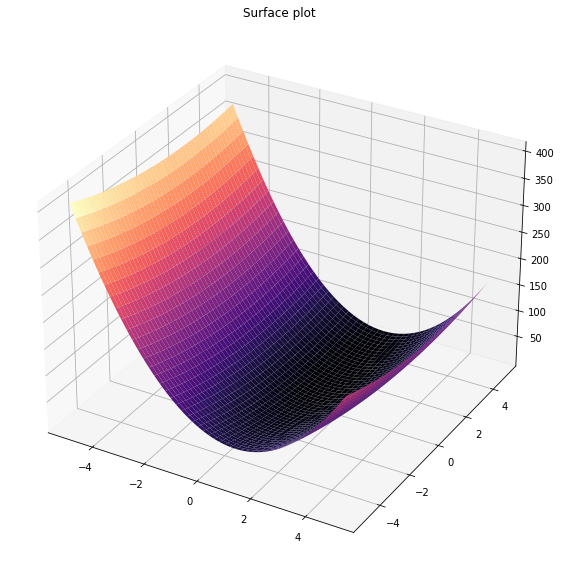

In [6]:
'''superficie'''
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_surface(x0v, x1v, z, cmap= 'magma')
ax.set_title('Surface plot')
plt.show()



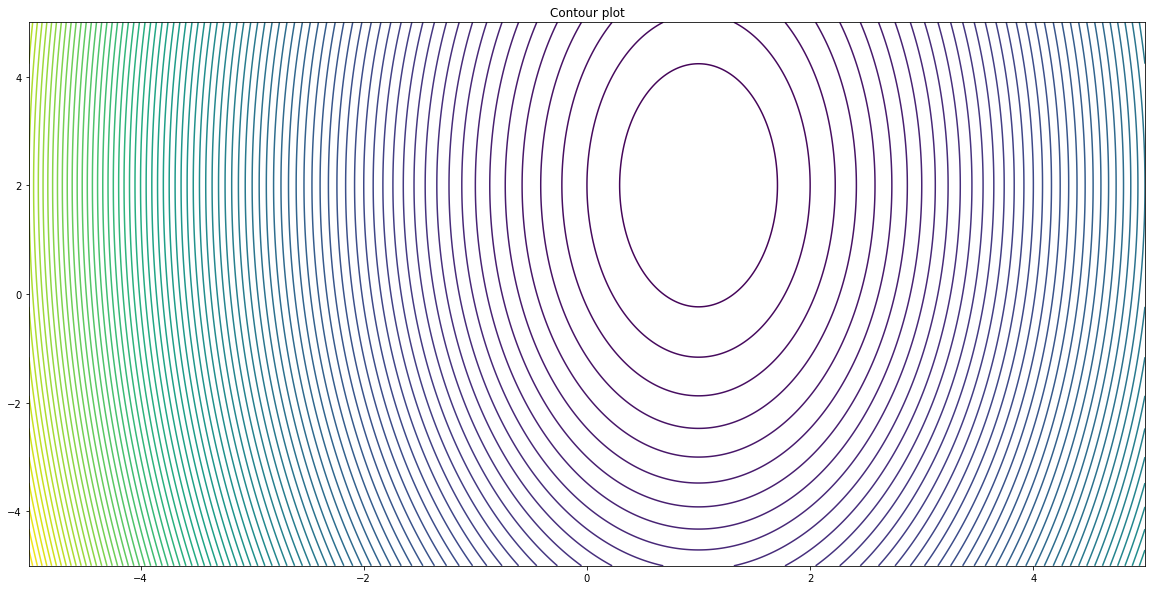

In [21]:
'''contour plots'''
if mode=='plot_history':
   plt.figure(figsize=(20,10))
   contours = plt.contour(x0v, x1v, z, levels=100)
   plt.title('Contour plot')
   plt.show()

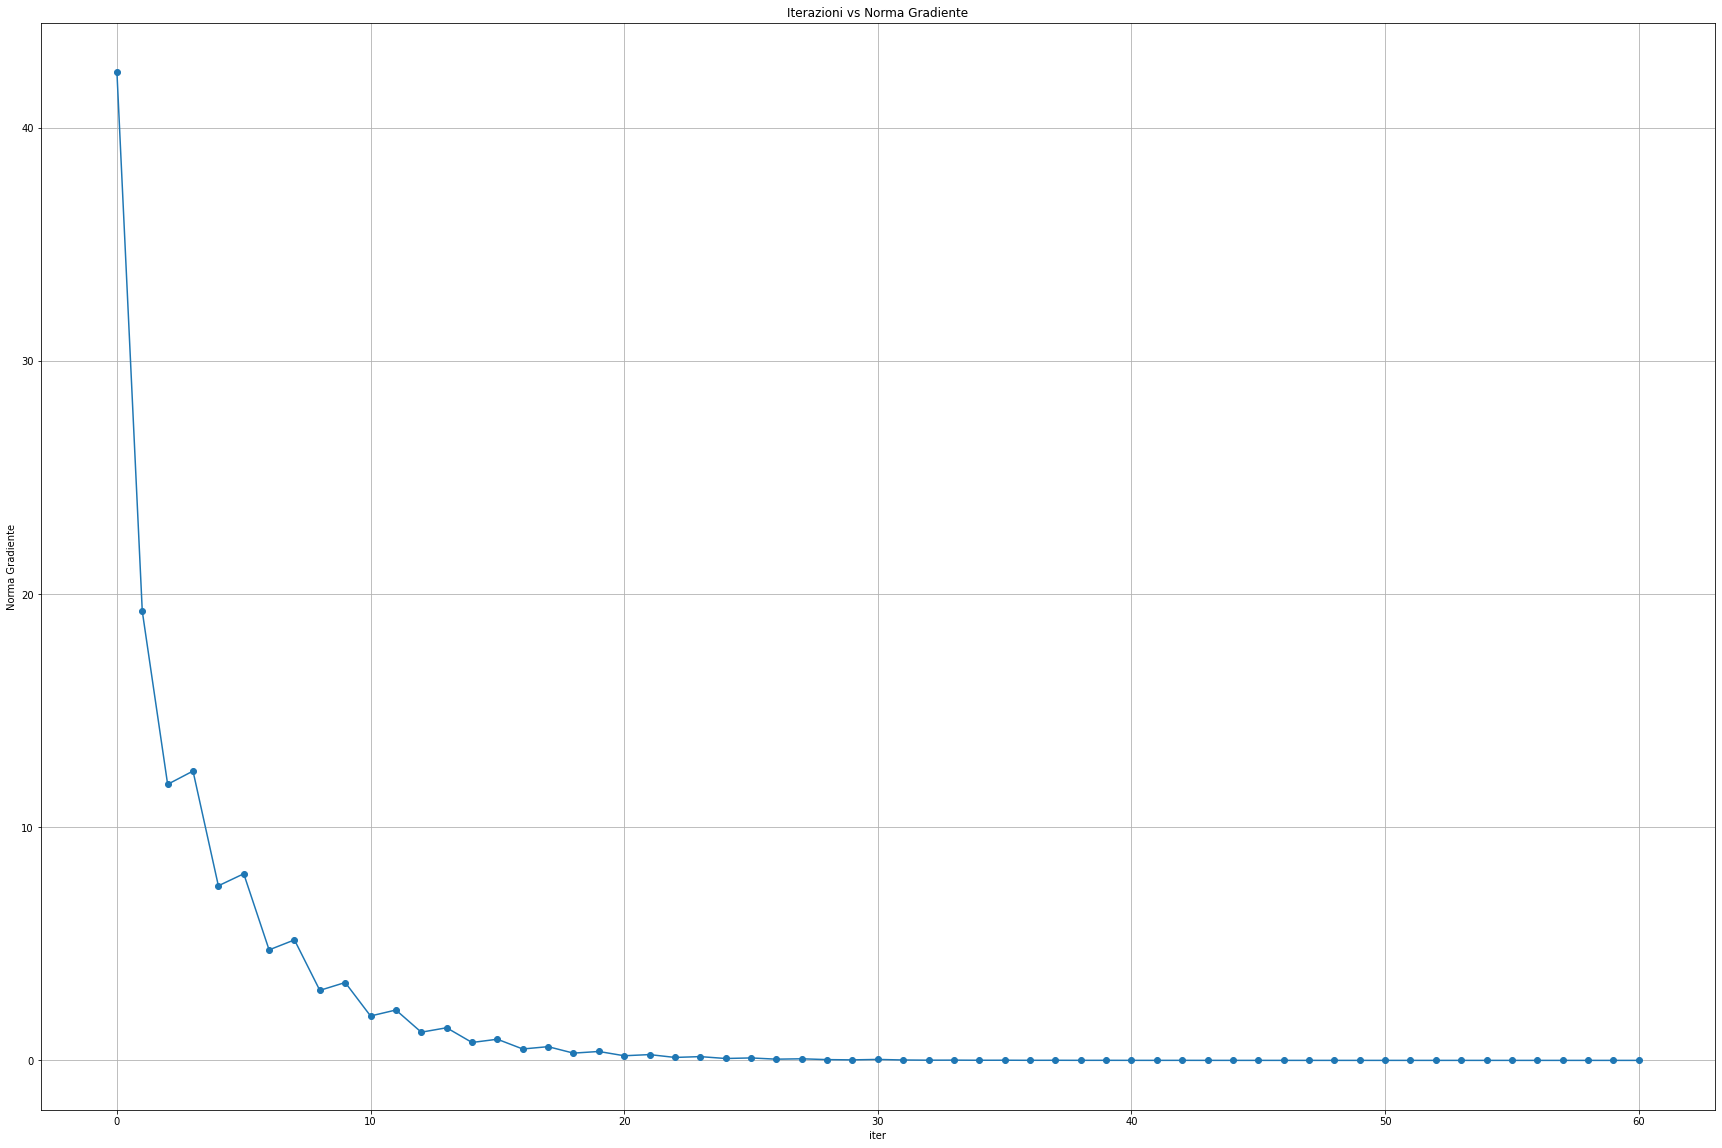

In [15]:
'''plots'''

# Iterazioni vs Norma Gradiente
plt.figure(figsize=(30,20))
plt.plot(norm_grad_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Norma Gradiente')
plt.title('Iterazioni vs Norma Gradiente')
plt.grid()


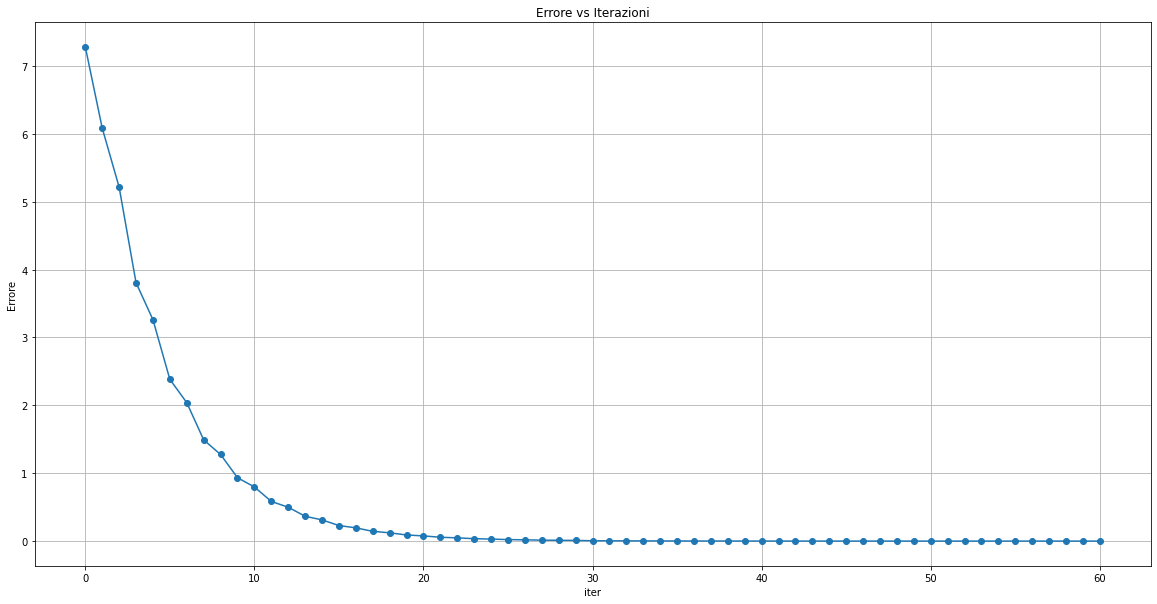

In [18]:
#Errore vs Iterazioni
plt.figure(figsize=(20,10))
plt.plot(error_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Errore')
plt.title('Errore vs Iterazioni')
plt.grid()


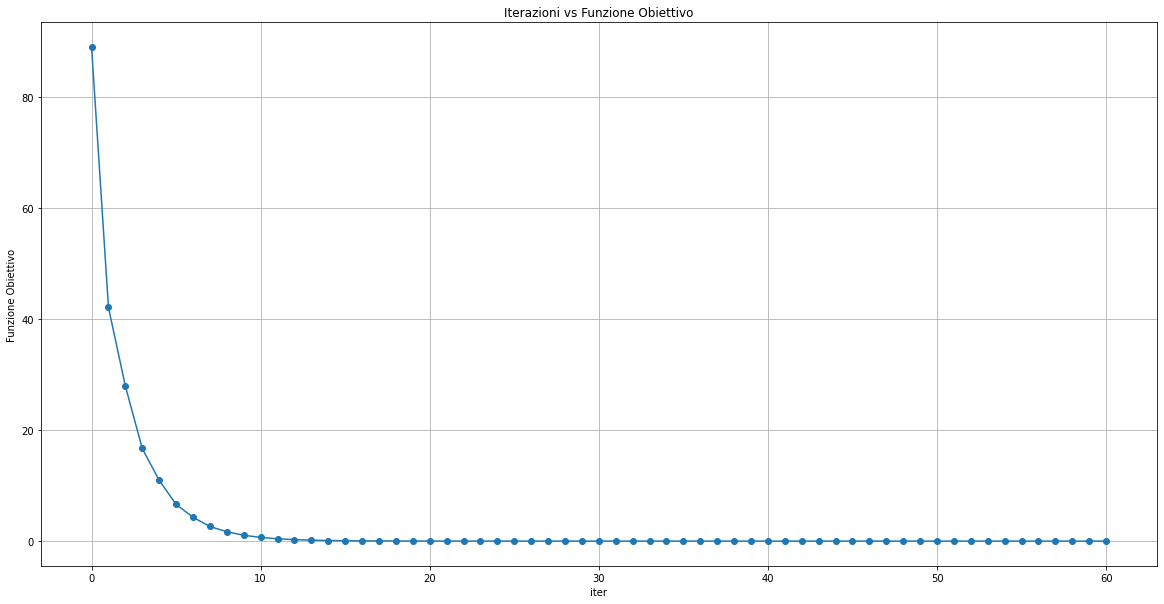

In [10]:
#Iterazioni vs Funzione Obiettivo
plt.figure(figsize=(20,10))
plt.plot(function_eval_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Funzione Obiettivo')
plt.title('Iterazioni vs Funzione Obiettivo')
plt.grid()
